In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 라이브러리 불러오기

In [17]:
import networkx as nx
import operator
import matplotlib.font_manager as fm
reload(fm)
fp1 = fm.FontProperties(fname="NotoSansKR-Regular.otf")
nx.set_fontproperties(fp1)

## 형태소 분석기 테스트

In [5]:
import Umorpheme.morpheme as um
from collections import OrderedDict

s = '형태소 분석기 유몰핌입니다'
server = 'http://information.center/api/korean'
apikey = '' # Register at http://information.center/korean
data = um.analyzer(s, server, apikey, '유몰핌,유니스트', 1)

temp = {}
for key, value in data.items():
    temp[int(key)] = value
data = OrderedDict(sorted(temp.items()))

for i, j in data.iteritems():
    print i, j['data'], j['feature']

0 형태소 분석기 COMP
2 유몰핌 CUSTOM
3 입니다 VCP+EC


### 명사 추출 함수

In [6]:
def nouns(s):
    """ 명사 추출 함수 """
    if type(s) == unicode:
        s = s.encode('utf8')
    server = 'http://information.center/api/korean'
    apikey = 'koorJRK3XO1G0W' # Register at http://information.center/korean
    data = um.analyzer(s, server, apikey, '유몰핌,유니스트', 1)

    temp = {}
    for key, value in data.items():
        temp[int(key)] = value
    data = OrderedDict(sorted(temp.items()))

    selected = []
    for i, j in data.iteritems():
        if j['feature'] in ['COMP', 'NNP', 'NNG']:
            selected.append(j['data'])
    return selected

### 텍스트 파일 불러와서 news 리스트로 만들기

In [7]:
filename = 'CHOSUN_2000.txt'
f = open(filename, 'r')
data = f.read()
f.close()
data = data.decode('cp949')
newslist = data.split('</DOC>') # 뉴스 리스트

news = list()
for n in newslist:
    if '<TEXT>' in n:
        content = n.split('<TEXT>')[1].split('</TEXT>')[0]
        news.append(content)

### news[0] 에서 명사만 keys로 저장

In [8]:
keys = nouns(news[0])

In [9]:
# 키 쌍 보기
for idx, key in enumerate(keys[:-1]):
    print keys[idx], '/', keys[idx+1]

시작 / 서울 광화문 이순신 장군 동상 앞
서울 광화문 이순신 장군 동상 앞 / 설치
설치 / 대형 시계추 숫자
대형 시계추 숫자 / 광화문 일대
광화문 일대 / 폭죽
폭죽 / 대형 카드 섹션
대형 카드 섹션 / 자
자 / 김창종 기자


#### news[0]의 keys들을 네트워크로 만들기

In [10]:
G = nx.Graph()
for idx, key in enumerate(keys[:-1]):
    G.add_edge(keys[idx], keys[idx+1])

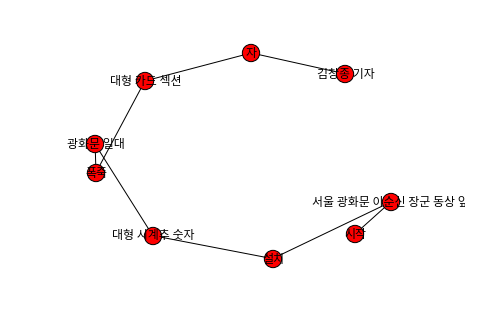

In [11]:
nx.draw(G, with_labels=True)

### news[:100], 다시 말해 0부터 100개의 뉴스에 대해서 네트워크 만들기

In [34]:
G = nx.Graph()
for idx, n in enumerate(news[:100]):
    keys = nouns(n)
    for idx, key in enumerate(keys[:-1]):
        G.add_edge(keys[idx], keys[idx+1])
    print idx

##### 네트워크 정보 보기

In [42]:
print "Number of Nodes : ", nx.number_of_nodes(G)
print "Number of Edges : ", nx.number_of_edges(G)
degreelist = list(G.degree().values())
print "Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G)
try:
    print "Avg. Path Length : ", nx.average_shortest_path_length(G)
except nx.NetworkXError as e:
    print e
print "Avg. Clustering Coefficient : ", nx.average_clustering(G)

Number of Nodes :  6342
Number of Edges :  11513
Avg. Node Degree :  3.6307158625
Avg. Path Length :  Graph is not connected.
Avg. Clustering Coefficient :  0.0300047983986


#### 매개 중심성 계산

In [43]:
print "::: Betweenness Centrality"
x = nx.betweenness_centrality(G)
sorted_list = sorted(x.iteritems(), key=operator.itemgetter(1), reverse=True)
for s in sorted_list[:20]:
    print s[0], s[1]

::: Betweenness Centrality
말 0.104391344794
세기 0.0986780404676
영어 0.0853527941617
사람 0.0705286253224
시작 0.0664821046246
한국 0.0593392098972
사회 0.0580923589283
미국 0.0564027991922
때 0.0559738219928
세계 0.0522529507936
일 0.0517032728802
인터넷 0.0474396342143
문제 0.0396114705076
생각 0.0294838565276
가능 0.0263923414413
대전 0.0220648444097
전망 0.020948456739
나라 0.0207255395789
시간 0.0196182585314
정치 0.0189321076171


#### 근접 중심성 계산

In [44]:
print "::: Closeness Centrality"
x = nx.closeness_centrality(G)
sorted_list = sorted(x.iteritems(), key=operator.itemgetter(1), reverse=True)
for s in sorted_list[:20]:
    print s[0], s[1]

::: Closeness Centrality
세기 0.290239577358
영어 0.287313881928
말 0.285400278528
한국 0.280894963094
때 0.278608941014
사람 0.278498078848
사회 0.277455382434
시작 0.277125804989
인터넷 0.274289986823
미국 0.273813064438
세계 0.272769650863
문제 0.270578588805
일 0.269478911118
나라 0.268342402121
생각 0.263130019942
가능 0.262472167482
점 0.26114462698
디지털 0.259691191762
국가 0.258922621974
시간 0.258593109216


### 그림 그리기

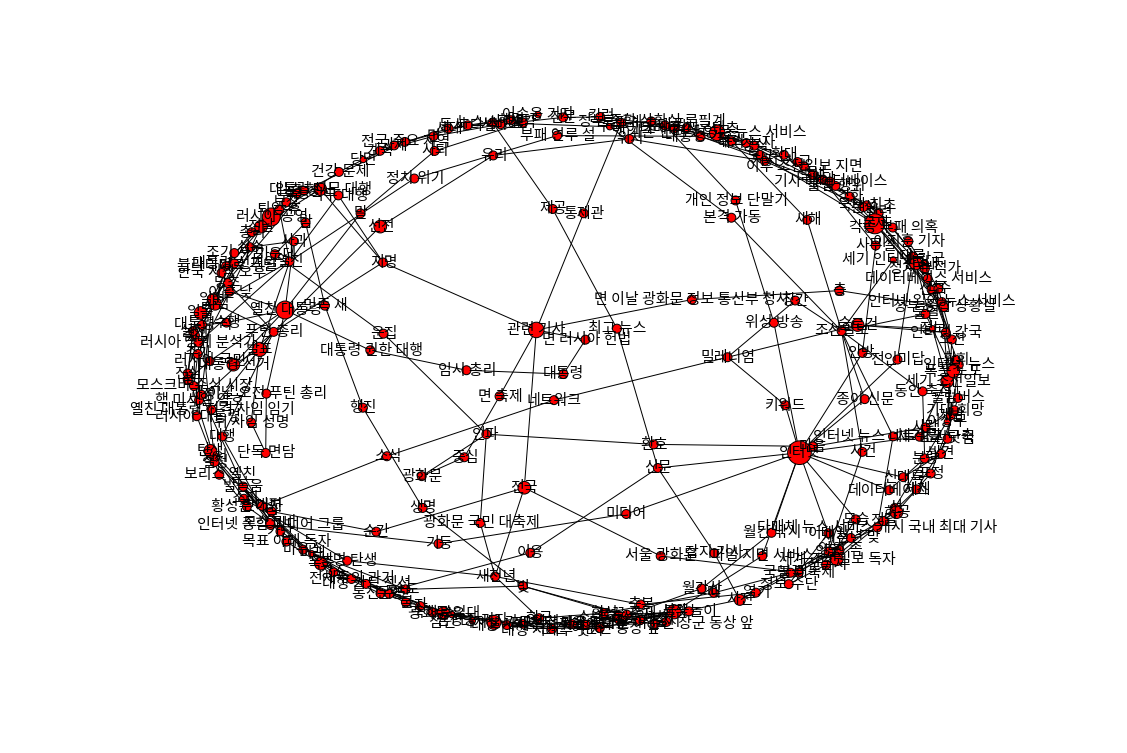

In [27]:
plt.figure(figsize=(15, 10)) # 그림의 크기, 넓이 15, 높이 10
degree = nx.degree(G).values() # 도수(degree)의 리스트
nx.draw(G, with_labels=True, node_size=[v*40 for v in degree], font_size=15)